In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

## Read inputs

In [254]:
GHG =  pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='GHG Emissions', decimal=',', index_col=0)
GHG

,Parameter,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.59200,46.944000,31.296000,15.64800,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18012,3.135090,2.090060,1.04503,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.34300,32.479333,30.615667,28.75200,26.888333,25.024667,23.16100,21.297333,19.433667,17.5700
Blue hydrogen emissions [kg CO2/kg H2] - Norway,NaN,Own calculation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.12116,3.897520,3.673880,3.45024,3.226600,3.002960,2.77932,2.555680,2.332040,2.1084
Properties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH4 LHV [KWh/kg],13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2 LHV [KWh/kg],33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH4 GWP20 [Years],86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH4 GWP100 [Years],30,"Bauer, https://www.ercevolution.energy/ipcc-si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
tea_lh2 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CAPEX ($/kW-H2), incl. Util.",EWI PTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"OPEX ($/kW-H2/a), incl. Util.",EWI PTX,NaN,57.69591,57.118951,56.541992,55.965033,55.388074,54.811115,54.234156,53.657197,...,37.646582,36.348424,35.050266,33.752108,32.45395,31.155792,29.857634,28.559476,27.261318,25.96316
Electricity use (kWh/kWh-H2,EWI PTX,0.01,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.01000


In [251]:
tra_d = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [216]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [217]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

In [218]:
# Compression capacity in [MWel/1000km]
capa_comp = float(GHG.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp

260.0

In [219]:
# Utilisation of the pipeline in %
pipe_use = float(GHG.loc['Pipeline load factor [%]']['Parameter'])
pipe_use

0.75

In [220]:
#Capacity at full load factor [kg H2/a]
capa_pipe = float(GHG.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe

2033571428.5714285

# Pipeline transport

Compression capacity in [MWel/1000km]
Utilisation of the pipeline in %
8760 h/a
Capacity at full load factor [kg H2/a]
Transport distance in [km]


In [221]:
# Calc. energy use for compression [kWh/kg_H2]
en_comp = capa_comp * 1000 * pipe_use * 8760 / capa_pipe / 1000 * (d_on + d_off)
en_comp

0.7979999999999999

Energy use per kg H2 delivered times emission factor for energy use.
en_comp = Total energy use for compression [kWh/kg H2]
EF_y_n = Emission factor of used energy in year y and country n [g CO2eq/kWh]

In [222]:
def Pipeline_emissions():

    result = en_comp * EF_y_n
    return result

Calc. pipeline emissions over time

Using grid electricity for compression.
Compressor station for subsea pipelines in exporting country.
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]
Energy use for compression in [kWh/kg H2]

In [223]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_emissions'])
result.index.name = 'Years'

for year in years:

    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.Pipeline_emissions.loc[year] = Pipeline_emissions()

result

,Pipeline_emissions
Years,
2025,259.154933
2026,243.744667
2027,228.3344
2028,212.924133
2029,197.513867
2030,182.1036
2031,170.136792
2032,158.169984
2033,146.203176


Plot emission breakdown for pipeline transport

In [224]:
##
ax = df3.iloc[index].plot.bar(stacked=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))

NameError: name 'df3' is not defined

# LH2 transport

Liquefaction energy use

Electricity use for liquefaction in [kWh/kg H2]
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]


## Liquefaction

In [225]:
def Conversion_emissions():
    result = el_liq_y * EF_y_n
    return result

In [226]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Conversion_emissions'])
for year in years:
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Conversion_emissions.loc[year] = Conversion_emissions()

result

,LH2_Conversion_emissions
2025,177.655121
2026,166.786808
2027,156.127501
2028,145.677199
2029,135.435904
2030,125.403615
2031,115.580332
2032,105.966055
2033,96.560784
2034,87.364518


In [227]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Conversion_emissions.csv')
result.to_csv(output_file, sep = ';')

## Export terminal

In [228]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

0.61

In [229]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [230]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

7.0

In [396]:
def ET_emissions():
    result = (el_et + el_reliq * t_et) * EF_y_n
    return result

In [405]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Export_terminal_emissions.loc[year] = ET_emissions()

result

,LH2_Export_terminal_emissions
Years,
2025,27.379789
2026,26.0108
2027,24.64181
2028,23.272821
2029,21.903831
2030,20.534842
2031,19.165852
2032,17.796863
2033,16.427874


In [406]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Export_terminal_emissions.csv')
result.to_csv(output_file, sep = ';')

In [408]:
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_Terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em

,LH2_Export_terminal_emissions
Years,
2025,27.379789274999997
2026,26.01079981125
2027,24.641810347499998
2028,23.272820883749997
2029,21.903831419999996
2030,20.534841956249995
2031,19.165852492499997
2032,17.796863028749996
2033,16.427873564999995


## Shipping

Calc. emission factor for cargo/fuel

In [542]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LH2_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
LH2_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [543]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)

In [544]:
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

,LH2_cargo_emissions
2025,7904.434911
2026,7668.557608
2027,7432.889311
2028,7197.430020
2029,6962.179736
2030,6727.138457
2031,6492.306184
2032,6257.682918
2033,6023.268657
2034,5789.063403


In [545]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_cargo_emissions.csv')
result.to_csv(output_file, sep = ';')

In [546]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2']) / 24
bog_ship

8.333333333333333e-05

In [547]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2']) / 1000
f_ship

1.1265151515151516e-06

In [548]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'sea distance (km)'].values)
d_sea

602.403

In [549]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [550]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LH2_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
LH2_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

,LH2_cargo_emissions
2025,7904.434911
2026,7668.557608
2027,7432.889311
2028,7197.430020
2029,6962.179736
2030,6727.138457
2031,6492.306184
2032,6257.682918
2033,6023.268657
2034,5789.063403


In [551]:
d_sea = 10000

Calc. LH2 shipping emissions

In [552]:
def calculate_ship_emissions():
    result = 1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) \
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg

    return result

In [553]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_emissions'])
result.index.name = 'Years'

for year in years:

    LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])

    # calculate emissions of specific year
    result.LH2_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

,LH2_Shipping_emissions
Years,
2025,309.652923
2026,300.443582
2027,291.242401
2028,282.049381
2029,272.86452
2030,263.68782
2031,254.519281
2032,245.358901
2033,236.206682


In [525]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Shipping_emissions.csv')
result.to_csv(output_file, sep = ';')

## Import terminal


In [421]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [422]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lh2.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [423]:
# Average storage time in the import terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

7.0

In [424]:
def IT_emissions():
    result = (el_it + el_reliq * t_it) * EF_y_n
    return result


# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.LH2_Import_terminal_emissions.loc[year] = IT_emissions()

result

,LH2_Import_terminal_emissions
Years,
2025,292.28
2026,274.9
2027,257.52
2028,240.14
2029,222.76
2030,205.38
2031,191.8836
2032,178.3872
2033,164.8908


In [425]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

## Reconversion


In [426]:
def calculate_recon_emissions():
    result = el_recon_y * EF_y_n
    return result

In [427]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_emissions'])
result.index.name = 'Years'


In [428]:
for year in years:

    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    # calculate emissions of specific year
    result.LH2_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

,LH2_Reconversion_emissions
Years,
2025,227.328889
2026,207.702222
2027,188.848
2028,170.766222
2029,153.456889
2030,136.92
2031,123.65832
2032,110.99648
2033,98.93448


In [429]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Total LH2 transport emissions

In [683]:
con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Shipping_emissions.csv', delimiter=';', decimal=',', index_col= 0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Import_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Reconversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)

In [684]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_emissions'])
result.index.name = 'Years'

In [685]:
# [g CO2eq/kg H2]
def calculate_LH2_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [686]:
for year in years:
    # get all emissions
    CE = float(con_em.loc[year]['LH2_Conversion_emissions'])
    EE = float(et_em.loc[year]['LH2_Export_terminal_emissions'])
    SE = float(ship_em.loc[year]['LH2_Shipping_emissions'])
    IE = float(it_em.loc[year]['LH2_Import_terminal_emissions'])
    RE = float(recon_em.loc[year]['LH2_Reconversion_emissions'])
    # calculate costs of specific year
    result.LH2_transport_emissions.loc[year] = calculate_LH2_transport_emissions()

result

,LH2_transport_emissions
Years,
2025,3501.874504
2026,3369.800812
2027,3238.781964
2028,3108.81796
2029,2979.9088
2030,2852.054484
2031,2731.641377
2032,2612.11051
2033,2493.461883


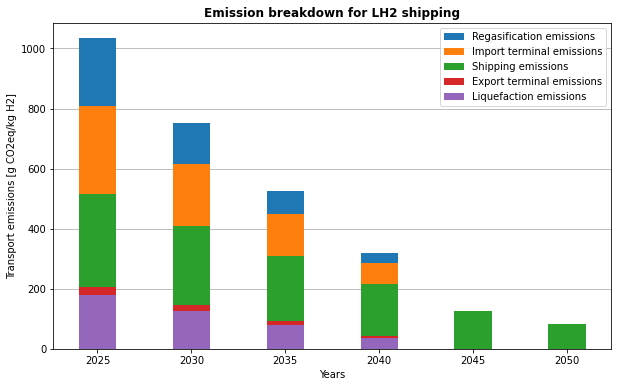

In [434]:
# Emission breakdown for LH2 seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (con_em.loc[::5]['LH2_Conversion_emissions']).apply(pd.to_numeric)
EE = (et_em.loc[::5]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (ship_em.loc[::5]['LH2_Shipping_emissions']).apply(pd.to_numeric)
IE = (it_em.loc[::5]['LH2_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (recon_em.loc[::5]['LH2_Reconversion_emissions']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x,RE, width, label='Regasification emissions', bottom= CE + EE + SE + IE)
IE_plt = plt.bar(x,IE, width, label='Import terminal emissions', bottom= CE + EE + SE)
SE_plt = plt.bar(x,SE, width, label='Shipping emissions', bottom= CE + EE)
EE_plt = plt.bar(x,EE, width, label='Export terminal emissions', bottom= CE)
CE_plt = plt.bar(x,CE, width, label='Liquefaction emissions')

plt.title('Emission breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport emissions [g CO2eq/kg H2]')
plt.xlabel('Years')
plt.show()

@ 10.000 km shipping distance. Large contributers to total emissions are emissions factors for grid electricity in import/exporting countries (assumed zero from 2045).

# NH3 transport

In [614]:
tea_lnh3 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LNH3', decimal=',', index_col=0)
tea_lnh3

,Ref,NH3,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],NaN,682.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg] [],BOG 2020,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reconversion - Efficiency [% LHV],IRENA 2022,NaN,0.98,0.980,0.98,0.980,0.98,0.980,0.98,0.980,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
Reconversion - Electricity consumption opt. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75
Reconversion - Electricity consumption pess. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75


## Conversion emissions

In [640]:
def Conversion_emissions():
    result = el_con_y * EF_y_n
    return result

In [641]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Conversion_emissions'])
for year in years:
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Conversion_emissions.loc[year] = Conversion_emissions()

result

,NH3_Conversion_emissions
2025,89.872591
2026,85.378961
2027,80.885332
2028,76.391702
2029,71.898073
2030,67.404443
2031,61.447771
2032,55.700106
2033,50.161446
2034,44.831792


In [642]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Conversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Export terminal

In [643]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et_nh3 = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et_nh3

0.005

In [644]:
el_reliq_nh3 = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq_nh3

0.0378

In [645]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

same storage time as for LH2

In [646]:
# Average storage time in the export terminal tanks in days
t_et

7.0

In [705]:
def ET_emissions():
    result = (el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n
    return result

In [706]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Export_terminal_emissions'])
result.index.name = 'Years'

In [707]:
for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Export_terminal_emissions.loc[year] = ET_emissions()

result

,NH3_Export_terminal_emissions
Years,
2025,0.962338
2026,0.914221
2027,0.866104
2028,0.817988
2029,0.769871
2030,0.721754
2031,0.673637
2032,0.62552
2033,0.577403


In [708]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Export_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [709]:
result

,NH3_Export_terminal_emissions
Years,
2025,0.962338
2026,0.914221
2027,0.866104
2028,0.817988
2029,0.769871
2030,0.721754
2031,0.673637
2032,0.62552
2033,0.577403


## Shipping

In [651]:
# Emissions of transported hydrogen carrier in [g CO2/kg_h2] in year y
NH3_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
NH3_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [652]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3']) / 24 * (NH3_lhv/H2_lhv)
bog_ship

0.0001615786578657866

In [653]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3']) / 1000 * (NH3_lhv/H2_lhv)
f_ship

3.933746996123837e-07

d_sea and v_ship are equivalent to LH2 transport

Calc. emission factor for cargo/fuel

In [654]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (NH3_Conversion_emissions.loc[::]['NH3_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (NH3_Export_terminal_emissions.loc[::]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
NH3_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('NH3_cargo_emissions')
NH3_cargo_emissions

,NH3_cargo_emissions
2025,7790.234929
2026,7562.053183
2027,7333.871436
2028,7105.689690
2029,6877.507943
2030,6649.326197
2031,6419.681408
2032,6190.245626
2033,5961.018849
2034,5732.001078


In [655]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_cargo_emissions.csv')
result.to_csv(output_file, sep=';')

In [656]:
d_sea = 10000

In [657]:
# Calc.NH3 shipping emissions
def calculate_ship_emissions():
    result = 1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea))\
             + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg
    return result

In [658]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Shipping_emissions'])
result.index.name = 'Years'

for year in years:
    NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    # calculate emissions of specific year
    result.NH3_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

,NH3_Shipping_emissions
Years,
2025,457.884713
2026,444.252586
2027,430.632537
2028,417.024568
2029,403.428678
2030,389.844867
2031,375.762264
2032,361.728659
2033,347.744002


In [659]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Shipping_emissions.csv')
result.to_csv(output_file, sep=';')

## Import terminal

In [660]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

0.02

In [661]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lnh3.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

0.0378

In [662]:

# Average storage time in the import terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

7.0

In [663]:
def IT_emissions():
    result = (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n
    return result

In [664]:
# Calc. import terimal emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.NH3_Import_terminal_emissions.loc[year] = IT_emissions()

result

,NH3_Import_terminal_emissions
Years,
2025,19.824237
2026,18.645418
2027,17.466599
2028,16.287779
2029,15.10896
2030,13.930141
2031,13.014732
2032,12.099323
2033,11.183914


In [665]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

## Reconversion

In [666]:
def calculate_recon_emissions():
    result = (heat_recon_y + el_recon_y) * EF_y_n
    return result

In [667]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Reconversion_emissions'])
result.index.name = 'Years'

for year in years:
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

     # calculate emissions of specific year
    result.NH3_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

,NH3_Reconversion_emissions
Years,
2025,4911.927778
2026,4502.251111
2027,4107.444
2028,3727.506444
2029,3362.438444
2030,3012.24
2031,2732.20926
2032,2463.72544
2033,2206.78854


In [668]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Total NH3 transport emissions

In [724]:
con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv',
                     delimiter=';', decimal=',', index_col=0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Shipping_emissions.csv',
                      delimiter=';', decimal=',', index_col=0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Import_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Reconversion_emissions.csv',
                       delimiter=';', decimal=',', index_col=0)

In [725]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_transport_emissions'])
result.index.name = 'Years'

In [726]:
# [g CO2eq/kg H2]
def calculate_NH3_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [727]:
for year in years:
    # get all emissions
    CE = float(con_em.loc[year]['NH3_Conversion_emissions'])
    EE = float(et_em.loc[year]['NH3_Export_terminal_emissions'])
    SE = float(ship_em.loc[year]['NH3_Shipping_emissions'])
    IE = float(it_em.loc[year]['NH3_Import_terminal_emissions'])
    RE = float(recon_em.loc[year]['NH3_Reconversion_emissions'])
    # calculate costs of specific year
    result.NH3_transport_emissions.loc[year] = calculate_NH3_transport_emissions()

result

,NH3_transport_emissions
Years,
2025,5480.471657
2026,5051.442297
2027,4637.294572
2028,4238.028481
2029,3853.644026
2030,3484.141205
2031,3183.107665
2032,2893.879047
2033,2616.455304


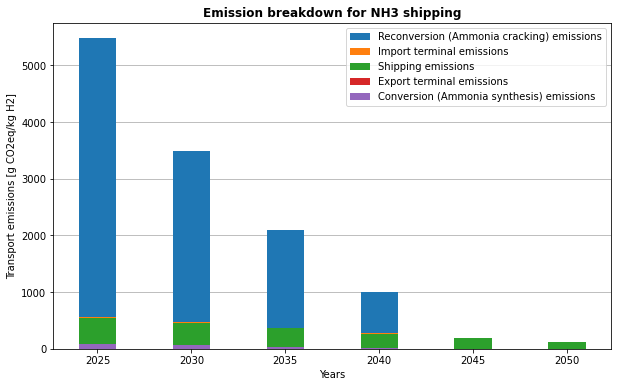

In [734]:
# Emission breakdown for NH3 seaborne transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (con_em.loc[::5]['NH3_Conversion_emissions']).apply(pd.to_numeric)
EE = (et_em.loc[::5]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (ship_em.loc[::5]['NH3_Shipping_emissions']).apply(pd.to_numeric)
IE = (it_em.loc[::5]['NH3_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (recon_em.loc[::5]['NH3_Reconversion_emissions']).apply(pd.to_numeric)
width = 2  # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x, RE, width, label='Reconversion (Ammonia cracking) emissions', bottom=CE + EE + SE + IE)
IE_plt = plt.bar(x, IE, width, label='Import terminal emissions', bottom=CE + EE + SE)
SE_plt = plt.bar(x, SE, width, label='Shipping emissions', bottom=CE + EE)
EE_plt = plt.bar(x, EE, width, label='Export terminal emissions', bottom=CE)
CE_plt = plt.bar(x, CE, width, label='Conversion (Ammonia synthesis) emissions')

plt.title('Emission breakdown for NH3 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport emissions [g CO2eq/kg H2]')
plt.xlabel('Years')
plt.show()

Largest contributer is reconversion at around 15 kWh/kg H2 are required to crack ammonia and it is assumed that electricity and heat are sourced from grid electricity, which has a high emission factor of around 300 g CO2eq/kWh in 2025 (in Germany).